# **Analise 3**

Com essa analise foi possivel inferir qual região tem maior e menor numero de vendas.

### **Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np

#### **Importando Tabelas** 

In [2]:
df_orders = pd.read_csv('./Files/Dataset_tratado/df_order_dataset.csv')
df_geo = pd.read_csv('./Files/Dataset_tratado/df_geolocation.csv')
df_customers = pd.read_csv('./Files/Dataset_tratado/df_customers.csv')

In [3]:
order_customer = pd.merge(df_orders, df_customers, how="inner", on="customer_id")

In [4]:
order_customer

,order_id,customer_id,order_status,order_purchase_timestamp_date,order_purchase_timestamp_hour,order_approved_at_date,order_approved_at_hour,order_delivered_carrier_date_date,order_delivered_carrier_date_hour,order_delivered_customer_date_date,order_delivered_customer_date_hour,order_estimated_delivery_date_date,order_estimated_delivery_date_hour,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,09:54:05,2017-03-09,09:54:05,2017-03-10,11:18:03,2017-03-17,15:08:01,2017-03-28,00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96457,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,12:58:58,2018-02-06,13:10:37,2018-02-07,23:22:42,2018-02-28,17:37:56,2018-03-02,00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96458,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,14:46:43,2017-08-27,15:04:16,2017-08-28,20:52:26,2017-09-21,11:24:17,2017-09-27,00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96459,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,21:28:27,2018-01-08,21:36:21,2018-01-12,15:35:03,2018-01-25,23:32:54,2018-02-15,00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [5]:
order_customer.groupby(['order_id']).size().reset_index()

,order_id,0
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
96456,fffc94f6ce00a00581880bf54a75a037,1
96457,fffcd46ef2263f404302a634eb57f7eb,1
96458,fffce4705a9662cd70adb13d4a31832d,1
96459,fffe18544ffabc95dfada21779c9644f,1


In [6]:
order_customer['customer_state'].value_counts()

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: count, dtype: int64

In [7]:
# Dicionário que mapeia cada estado para sua respectiva região
estado_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
    'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

# Adiciona uma nova coluna 'regiao' ao DataFrame com base no mapeamento
order_customer['regiao'] = order_customer['customer_state'].map(estado_regiao)

order_customer


,order_id,customer_id,order_status,order_purchase_timestamp_date,order_purchase_timestamp_hour,order_approved_at_date,order_approved_at_hour,order_delivered_carrier_date_date,order_delivered_carrier_date_hour,order_delivered_customer_date_date,order_delivered_customer_date_hour,order_estimated_delivery_date_date,order_estimated_delivery_date_hour,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Sudeste
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Nordeste
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Centro-Oeste
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Nordeste
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,09:54:05,2017-03-09,09:54:05,2017-03-10,11:18:03,2017-03-17,15:08:01,2017-03-28,00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,Sudeste
96457,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,12:58:58,2018-02-06,13:10:37,2018-02-07,23:22:42,2018-02-28,17:37:56,2018-03-02,00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Sudeste
96458,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,14:46:43,2017-08-27,15:04:16,2017-08-28,20:52:26,2017-09-21,11:24:17,2017-09-27,00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Nordeste
96459,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,21:28:27,2018-01-08,21:36:21,2018-01-12,15:35:03,2018-01-25,23:32:54,2018-02-15,00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Sudeste


In [8]:
vendas_regiao = order_customer['regiao'].value_counts()
vendas_regiao

regiao
Sudeste         66187
Sul             13812
Nordeste         9042
Centro-Oeste     5624
Norte            1796
Name: count, dtype: int64

<Axes: xlabel='regiao'>

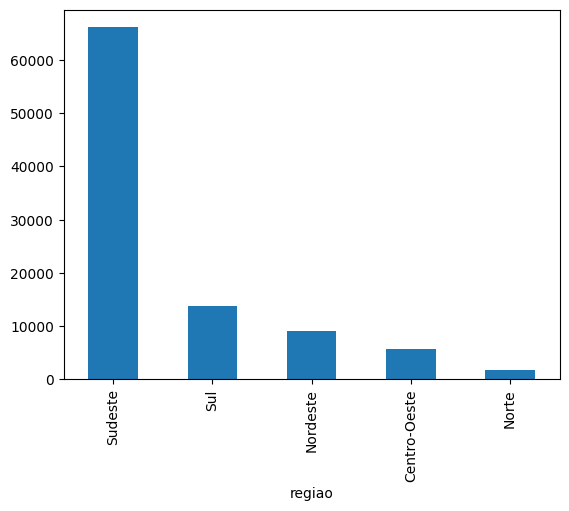

In [9]:
vendas_regiao.plot(kind='bar')